# Autoregressive model

Definition a la D. S. Matteson:

\begin{equation}
    Y_{t} - \mu = \Phi\left( Y_{t-1} - \mu \right) + \epsilon_{t}
\end{equation}

\begin{equation}
    Y_{t}= \Phi\left( Y_{t-1} - \mu \right) + \mu + \epsilon_{t}
\end{equation}

\begin{equation}
    Y_{t}= \Phi Y_{t-1} + \left( 1- \Phi\right) \mu + \epsilon_{t}
\end{equation}

- $\mu$: mean
- $\epsilon_{t} \sim \mathcal{N}(0,\sigma^{2})$]
- $\phi$: slope

Wikipedia definition:

\begin{equation}
    X_{t}
    =
    c + \sum_{i=1}^{p} \phi_{i} X_{t-1} + \epsilon_{t}
\end{equation}

In [ ]:
x1 <- arima.sim(model=list(ar=0.50), n=100)
x2 <- arima.sim(model=list(ar=0.90), n=100)
x3 <- arima.sim(model=list(ar=-0.75), n=100)

In [ ]:
par(mfrow=c(3,1))
plot(x1)
plot(x2)
plot(x3)

In [ ]:
plot.ts(cbind(x1,x2,x3))

In [ ]:
par(mfrow=c(3,1))
acf(x1)
acf(x2)
acf(x3)

In [ ]:
ar_a <- arima.sim(model = list(ar=0.90), n = 200)
ar_b <- arima.sim(model = list(ar=0.99), n = 200)
rw     <- arima.sim(model = list(order = c(0, 1, 0)), n = 200)

In [ ]:
par(mfrow=c(3,1))
plot(ar_a)
plot(ar_b)
plot(rw)

In [ ]:
par(mfrow=c(3,1))
acf(ar_a)
acf(ar_b)
acf(rw)

## AR Model estimation and forecasting

### `Mishkin` dataset (from the 'Ecdat' pkg)

Inflation and Interest Rates

**Description**

- monthly observations from 1950-2 to 1990-12
- number of observations : 491
- observation : country
- country : United States

**Usage**
data(Mishkin)

**Format**
A time series containing :
- pai1 one-month inflation rate (in percent, annual rate)
- pai3 three-month inflation rate (in percent, annual rate)
- tb1 one-month T-bill rate (in percent, annual rate)
- tb3 three-month T-bill rate (in percent, annual rate)
- cpi CPI for urban consumers, all items (the 1982-1984 average is set to 100)

In [14]:
data(Mishkin, package="Ecdat")

In [18]:
class(Mishkin)

[1] "mts" "ts"

In [ ]:
`mts` = multivariate time series

In [10]:
inflation <- as.ts(Mishkin[,1])

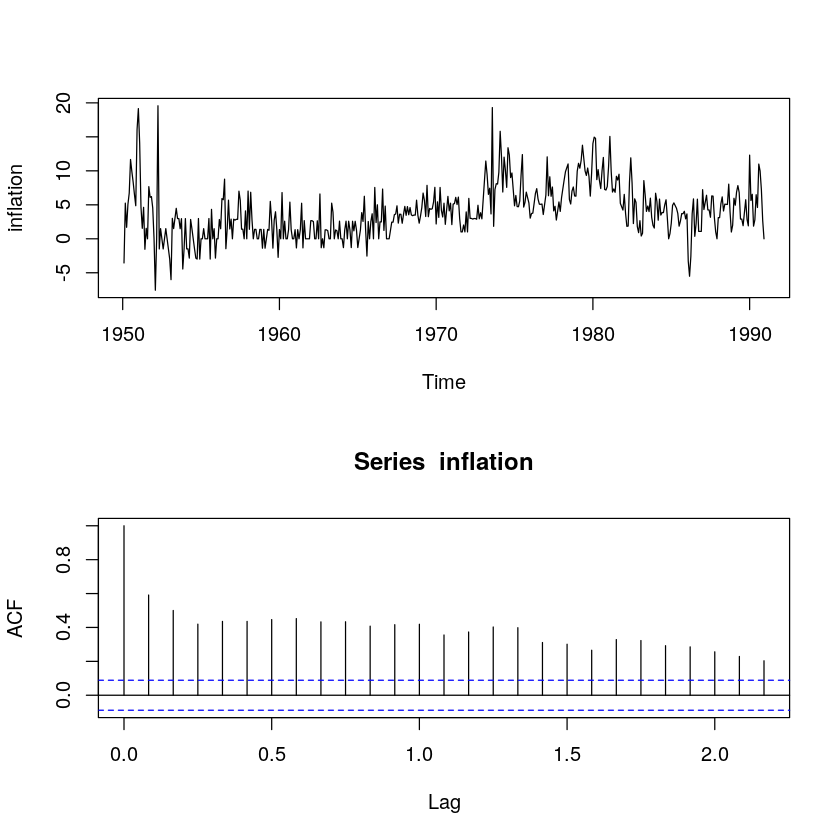

In [29]:
par(mfrow=c(2,1))
ts.plot(inflation)

acf(inflation)

Fitted model $AR(p=1)$

corresponding to

~~~~
order = c(1,0,0)
~~~~

\begin{equation}
    Y_{t} - \mu = \Phi(Y_{t-1} - \mu) + \epsilon_{t}
\end{equation}

where:
- $\epsilon \sim N(0,\sigma^{2}_{\epsilon})$

In [31]:
AR_inflation <- arima(inflation, order=c(1,0,0))

In [46]:
AR_inflation


Call:
arima(x = inflation, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5960     3.9745
s.e.  0.0364     0.3471

sigma^2 estimated as 9.713:  log likelihood = -1255.05,  aic = 2516.09

- ar1 = $\hat{\Phi}$
- intercept = $\hat{\mu}$
- sigma = $\hat{\sigma}^{2}_{\epsilon}$

In [48]:
ar1 <- AR_inflation$coef['ar1']
intercept <- AR_inflation$coef['intercept']
sigma2 <- AR_inflation$sigma2

In [54]:
sprintf("- phi:    %.3f", ar1)
sprintf("- mu:     %.3f", intercept)
sprintf("- sigma2: %.3f", sigma2)

[1] "- phi:    0.596"

[1] "- mu:     3.974"

[1] "- sigma2: 9.713"

Fitted $AR(p=1)$ model prediction

\begin{equation}
    \hat{Y}_{t}
    =
    \hat{\mu}
    +
    \hat{\Phi} (Y_{t-1} - \hat{\mu})
\end{equation}


Residuals:

\begin{equation}
    \hat{\epsilon}_{t}
    =
    Y_{t}
    -
    \hat{Y}_{t}
\end{equation}


The prediction can be expressed as:

\begin{equation}
    \hat{Y}_{t}
    =
    Y_{t}
    -
    \hat{\epsilon}_{t}
\end{equation}

In [65]:
AR_inflation_fitted <- inflation - residuals(AR_inflation)

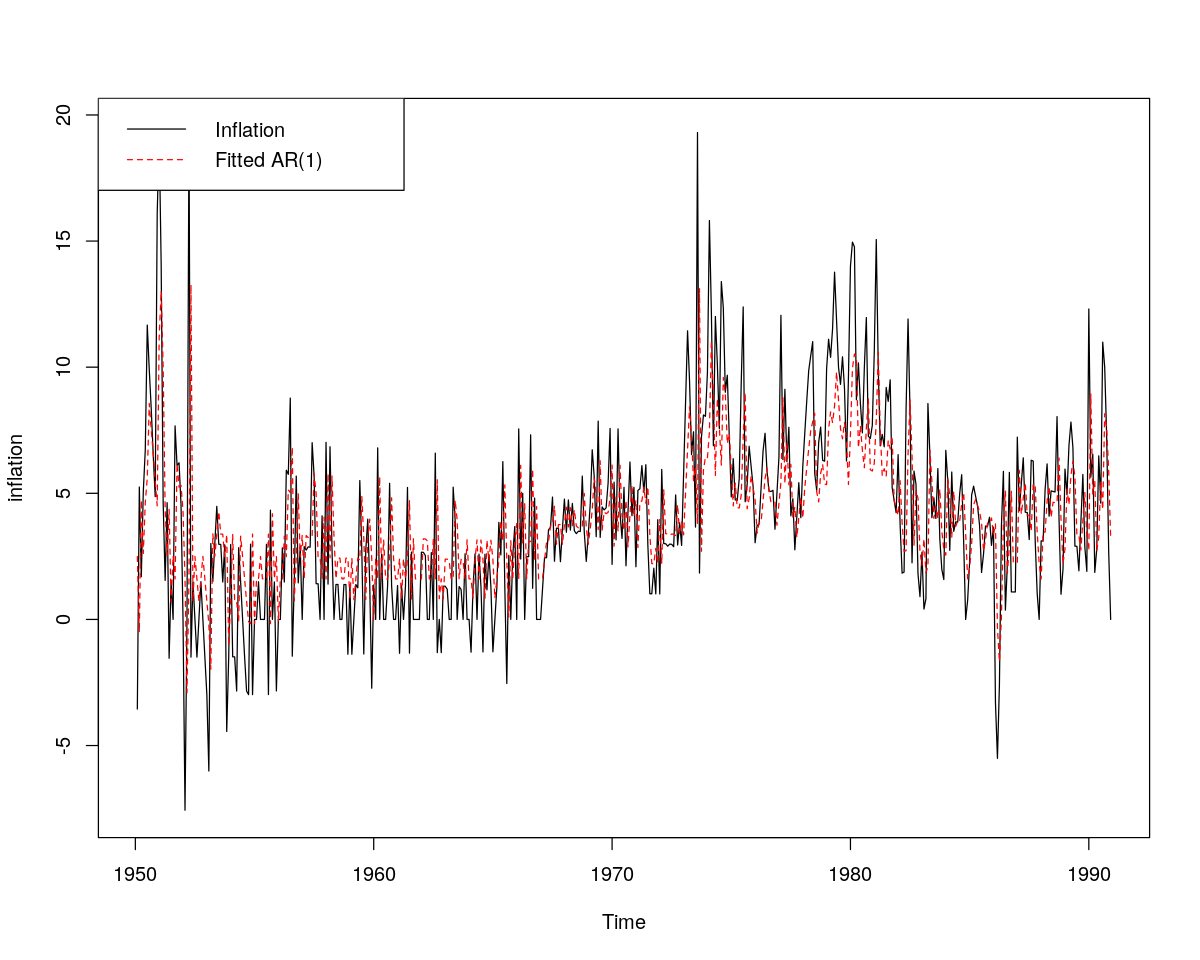

In [89]:
options(repr.plot.width=10, repr.plot.height=8)
ts.plot(inflation)

points(AR_inflation_fitted, type='l', col='red', lty=2)
legend("topleft", legend=c("Inflation", "Fitted AR(1)"), col=c("black", "red"), lty=c(1,2))

In [92]:
predict(AR_inflation)

$pred
          Jan
1991 1.605797

$se
          Jan
1991 3.116526


In [93]:
predict(AR_inflation, n.ahead=6)

$pred
          Jan      Feb      Mar      Apr      May      Jun
1991 1.605797 2.562810 3.133165 3.473082 3.675664 3.796398

$se
          Jan      Feb      Mar      Apr      May      Jun
1991 3.116526 3.628023 3.793136 3.850077 3.870101 3.877188


In [96]:
?predict

In [95]:
?residuals

## Autoregression on `AirPassangers`

In [97]:
AR <- arima(AirPassengers, order = c(1,0,0))
print(AR)


Call:
arima(x = AirPassengers, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9646   278.4649
s.e.  0.0214    67.1141

sigma^2 estimated as 1119:  log likelihood = -711.09,  aic = 1428.18


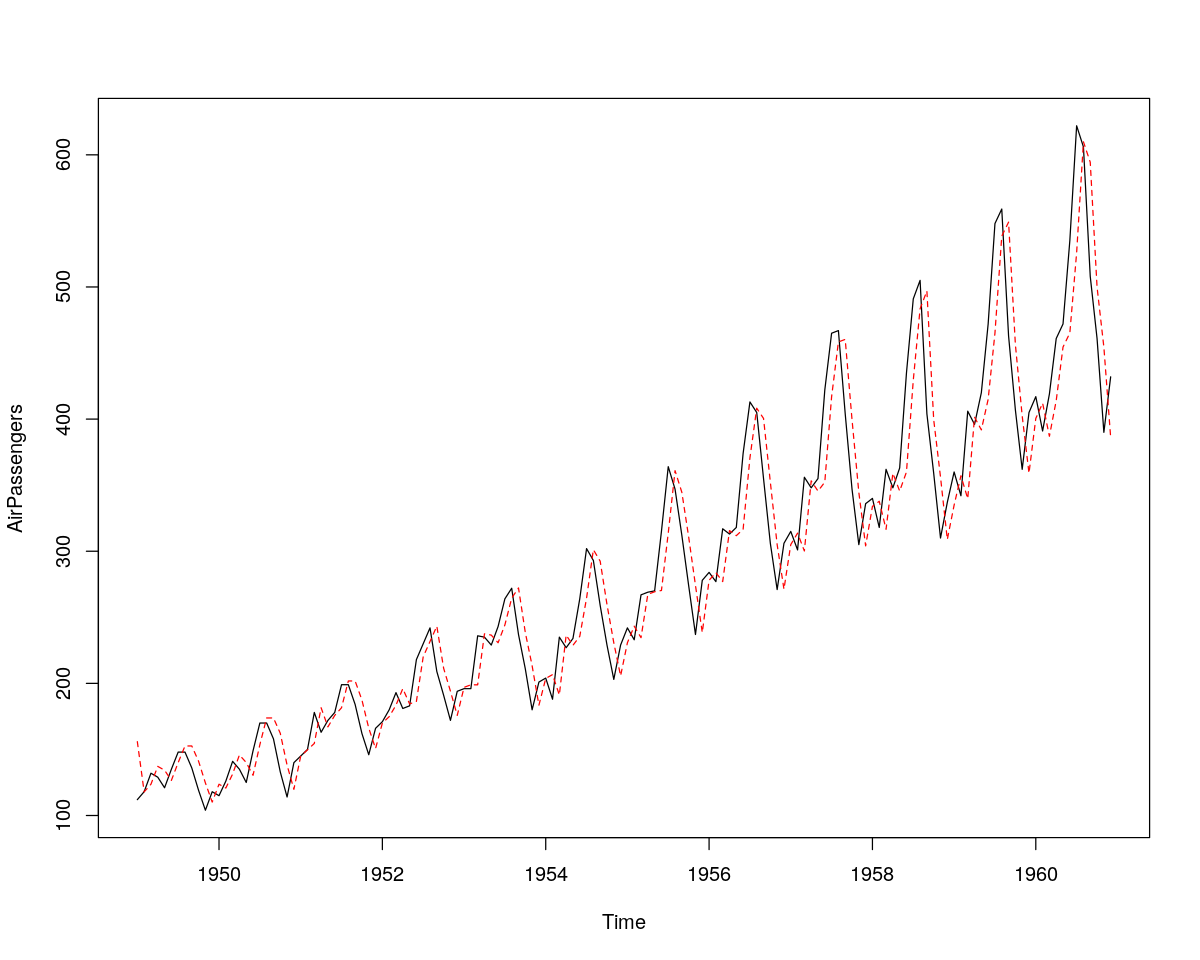

In [98]:
ts.plot(AirPassengers)
AR_fitted <- AirPassengers - residuals(AR)
points(AR_fitted, type = "l", col = 2, lty = 2)

## Autoregression on `Nile`

In [104]:
Nile_AR_fit <-arima(Nile, order  = c(1,0,0))
print(Nile_AR_fit)


Call:
arima(x = Nile, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5063   919.5685
s.e.  0.0867    29.1410

sigma^2 estimated as 21125:  log likelihood = -639.95,  aic = 1285.9


In [114]:
Nile_prediction <- predict(Nile_AR_fit, n.ahead=10)

In [118]:
Nile_prediction_mean <- Nile_prediction$pred
Nile_prediction_se <- Nile_prediction$se

In [119]:
Nile_prediction['pred'][1]

$pred
Time Series:
Start = 1971 
End = 1980 
Frequency = 1 
 [1] 828.6576 873.5426 896.2668 907.7715 913.5960 916.5448 918.0377 918.7935
 [9] 919.1762 919.3699


In [120]:
cycle(Nile)

Time Series:
Start = 1871 
End = 1970 
Frequency = 1 
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

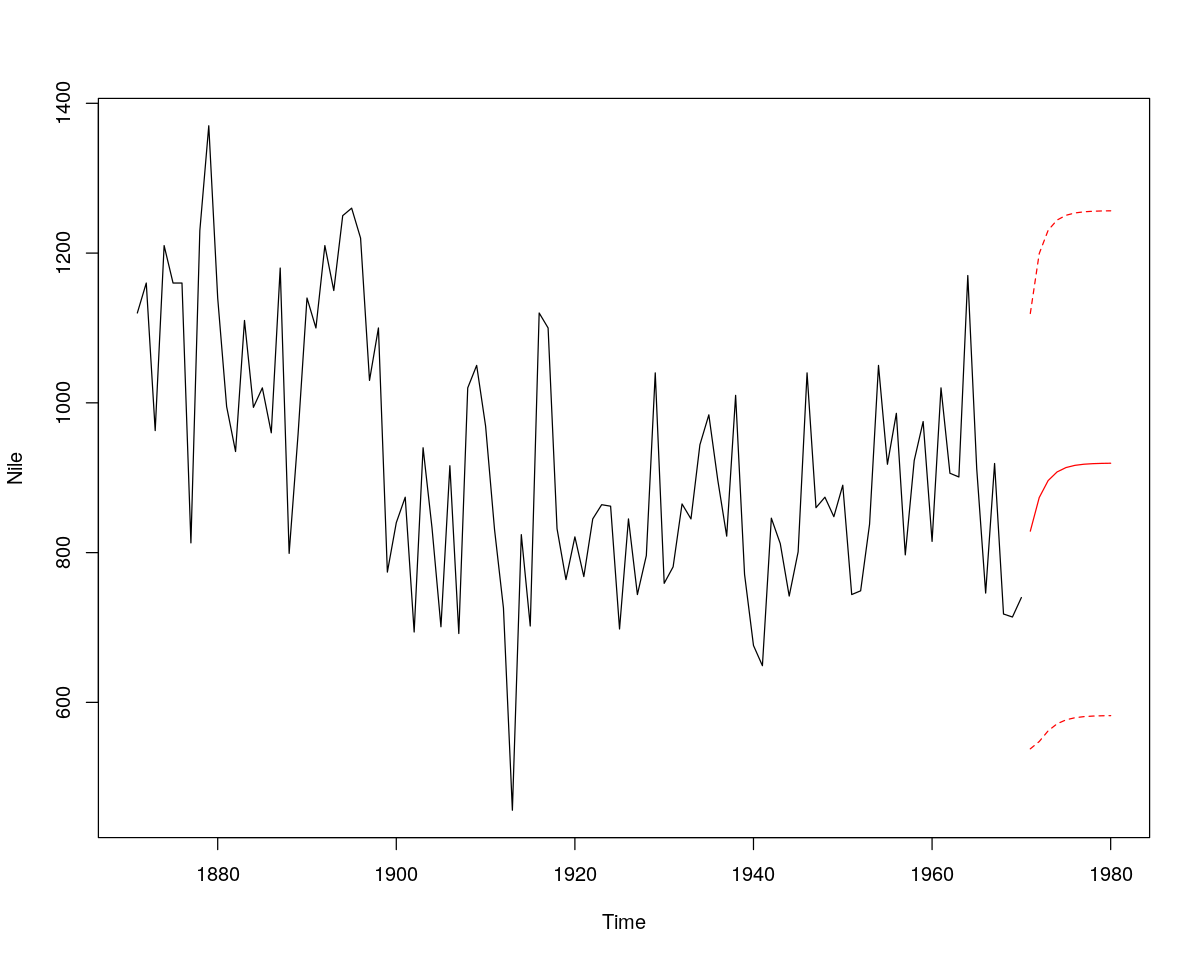

In [123]:
ts.plot(Nile, xlim = c(1871, 1980))
points(Nile_prediction_mean, type = "l", col = 2)
points(Nile_prediction_mean - 2*Nile_prediction_se, type = "l", col = 2, lty = 2)
points(Nile_prediction_mean + 2*Nile_prediction_se, type = "l", col = 2, lty = 2)